In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import DataProcess as DP

In [2]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [3]:
[x.shape for x in datalabels]

[(426, 198),
 (453, 198),
 (292, 198),
 (399, 198),
 (472, 198),
 (432, 198),
 (398, 198),
 (450, 198),
 (8, 198)]

In [4]:
# Stack data from different subjects into one chunk:
datalabels=np.vstack(datalabels)

In [5]:
datalabels.shape

(3330, 198)

In [6]:
data=datalabels[:,:-1]
label=datalabels[:,-1]

In [7]:
datanorm=data/np.std(data,axis=0)

In [8]:
U,s,V=np.linalg.svd(data,full_matrices=False)

In [9]:
spectrum=s**2/sum(s**2)

In [10]:
accu=np.array([sum(spectrum[:i+1]) for i in range(198)])

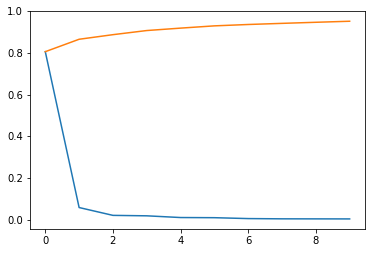

In [11]:
plt.plot(spectrum[:10])
plt.plot(accu[:10])

In [12]:
datax=data.dot(V[0])
datay=data.dot(V[1])
dataz=data.dot(V[2])

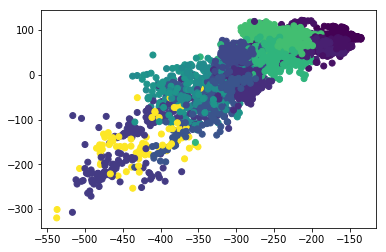

In [13]:
import numpy
import pylab
xy = numpy.zeros((2, 3330))
xy[0] = datax
xy[1] = datay
colors = label
pylab.scatter(xy[0], xy[1], c=colors)
pylab.show()

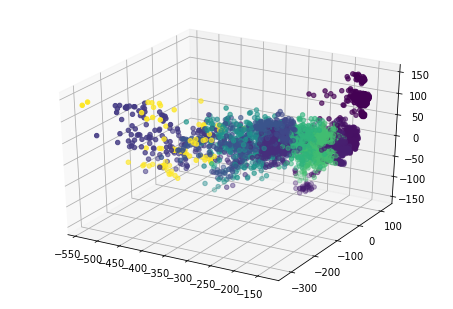

In [14]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(datax,datay,dataz,c=label)
pyplot.show()